#Strategy

1. Stock Price > 200 Day MA
2. If 10-period RSI of stock < 30, buy next day's open
3. If 10-period RSI of stock > 40 OR after 10 trading days, sell next day's open

#RSI Calculation

1. UpMove: Take daily return if return is positive else 0 if daily return is negative or zero
2. DownMove: abs(daily return) if return is negative else take zero if return is positive or zero
3. Average Up and Downmoves - Wilder's smoothing method (WSM) == Exponential Moving Avg with a different smoothing factor
4. Smoothing factor in EMA: alpha = 2/(N+1) and smoothing factor in WSM: alpha = N/10
5. If alpha = 0.1 then N/10 = 2/(N+1), hence N = 19 in WSM formula
6. Relative Strength (RS) = Average UpMove / Average DownMove
7. Relative Strength Index (RSI) = 100 - 100/(1+RS)

In [1]:
!pip install yfinance --quiet

     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 26.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

%matplotlib inline

In [16]:
tickers = pd.read_csv('/content/nifty_50_symbols.csv')
tickers

,Symbol
0,ADANIPORTS.NS
1,ASIANPAINT.NS
2,AXISBANK.BO
3,BAJAJ-AUTO.NS
4,BAJFINANCE.NS
5,BAJAJFINSV.NS
6,BPCL.BO
7,BHARTIARTL.NS
8,BRITANNIA.BO
9,CIPLA.NS


In [17]:
tickers = tickers['Symbol'].tolist()
tickers

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.BO',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.BO',
 'BHARTIARTL.NS',
 'BRITANNIA.BO',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.BO',
 'RDY',
 'EICHERMOT.BO',
 'GRASIM.BO',
 'HCLTECH.BO',
 'HDFCBANK.BO',
 'HDFCLIFE.BO',
 'HEROMOTOCO.NS',
 'HINDALCO.BO',
 'HINDUNILVR.BO',
 'HDFC.NS',
 'ICICIBANK.BO',
 'IOC.BO',
 'INDUSINDBK.NS',
 'INFY.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.BO',
 'LT.BO',
 'M&M.BO',
 'MARUTI.BO',
 'NESTLEIND.BO',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.BO',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.BO',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.BO',
 'TITAN.NS',
 'ULTRACEMCO.BO',
 'UPL.NS',
 'WIPRO.NS']

In [18]:
def RSICalc(asset):
    df = yf.download(asset, start='2011-01-01')
    # 200 day MA
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    # Daily return
    df['PriceChange'] = df['Adj Close'].pct_change()
    # Up Move
    df['UpMove'] = df['PriceChange'].apply(lambda x: x if x > 0 else 0)
    # Down Move
    df['DownMove'] = df['PriceChange'].apply(lambda x: abs(x) if x < 0 else 0)
    # Avg Up Moves and Down Moves
    df['AvgUp'] = df['UpMove'].ewm(span=19).mean()
    df['AvgDown'] = df['DownMove'].ewm(span=19).mean()
    # Drop NA
    df = df.dropna()
    # Calculate RS and RSI
    df['RS'] = df['AvgUp']/df['AvgDown']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    # Set Buy decision rules
    df.loc[(df['Adj Close'] > df['MA200'])&(df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200'])|(df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [19]:
RSICalc(tickers[0])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,PriceChange,UpMove,DownMove,AvgUp,AvgDown,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-10-20,148.000000,152.800003,147.600006,151.800003,142.866013,370257,137.666410,0.009308,0.009308,0.000000,0.007960,0.009026,0.881876,46.861548,No
2011-10-21,149.000000,153.000000,149.000000,150.449997,141.595490,300342,137.696327,-0.008893,0.000000,0.008893,0.007164,0.009013,0.794861,44.285382,No
2011-10-24,155.050003,157.600006,151.649994,156.500000,147.289429,1167828,137.738351,0.040213,0.040213,0.000000,0.010469,0.008112,1.290603,56.343367,No
2011-10-25,156.500000,162.500000,155.500000,161.250000,151.759842,1139611,137.760423,0.030351,0.030351,0.000000,0.012457,0.007300,1.706346,63.049812,No
2011-10-28,162.399994,170.449997,162.399994,163.399994,153.783310,1051878,137.804999,0.013333,0.013333,0.000000,0.012545,0.006570,1.909276,65.627190,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-22,757.650024,764.950012,751.549988,754.250000,754.250000,2854708,737.344464,0.000000,0.000000,0.000000,0.007640,0.002700,2.829323,73.885726,No
2022-07-25,757.000000,757.250000,746.049988,749.950012,749.950012,1592179,737.400055,-0.005701,0.000000,0.005701,0.006876,0.003000,2.291698,69.620539,No
2022-07-26,749.900024,753.500000,745.000000,749.099976,749.099976,1803260,737.550461,-0.001133,0.000000,0.001133,0.006188,0.002814,2.199375,68.743896,No


In [20]:
def getSignals(df):
    BuyingDates = []
    SellingDates = []

    for i in range(len(df)-11):
        if "Yes" in df['Buy'].iloc[i]:
            # Buy on the next day
            BuyingDates.append(df.iloc[i+1].name)
            # Check selling rules - if RSI > 40 on any of the next 10 days after buying
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 40:
                    # name contains timestamp of date
                    SellingDates.append(df.iloc[i+j+1].name)
                    break
                elif j == 10:
                    SellingDates.append(df.iloc[i+j+1].name)
    
    return BuyingDates, SellingDates

In [21]:
frame = RSICalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


In [23]:
# Buy signals
buy

[Timestamp('2013-06-14 00:00:00'),
 Timestamp('2014-12-10 00:00:00'),
 Timestamp('2015-02-09 00:00:00'),
 Timestamp('2015-02-10 00:00:00'),
 Timestamp('2017-11-17 00:00:00'),
 Timestamp('2019-05-10 00:00:00'),
 Timestamp('2019-07-25 00:00:00'),
 Timestamp('2019-07-26 00:00:00'),
 Timestamp('2019-07-29 00:00:00'),
 Timestamp('2019-07-30 00:00:00'),
 Timestamp('2019-07-31 00:00:00'),
 Timestamp('2021-06-17 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2022-05-12 00:00:00')]

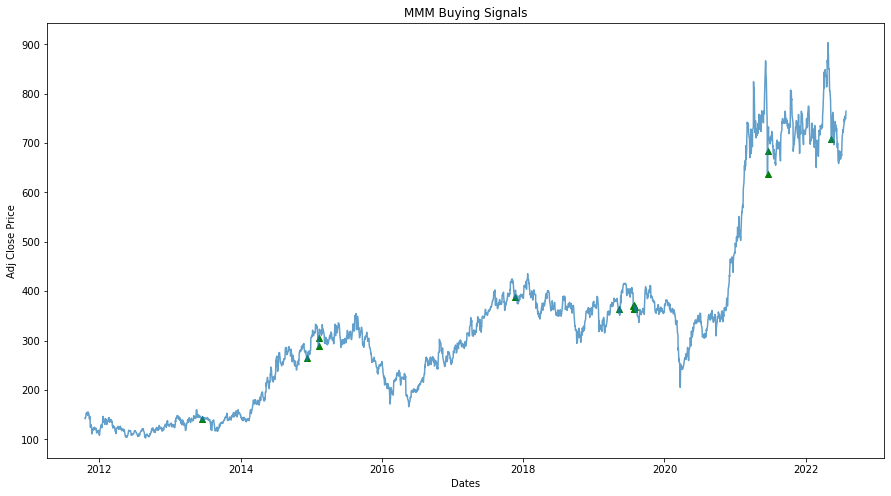

In [24]:
plt.figure(figsize=(15,8))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker='^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)
plt.title('MMM Buying Signals')
plt.xlabel("Dates")
plt.ylabel('Adj Close Price')
plt.show()

In [25]:
#Sell signals
sell

[Timestamp('2013-06-17 00:00:00'),
 Timestamp('2014-12-12 00:00:00'),
 Timestamp('2015-02-11 00:00:00'),
 Timestamp('2015-02-11 00:00:00'),
 Timestamp('2017-11-23 00:00:00'),
 Timestamp('2019-05-13 00:00:00'),
 Timestamp('2019-08-07 00:00:00'),
 Timestamp('2019-08-07 00:00:00'),
 Timestamp('2019-08-07 00:00:00'),
 Timestamp('2019-08-07 00:00:00'),
 Timestamp('2019-08-07 00:00:00'),
 Timestamp('2021-06-22 00:00:00'),
 Timestamp('2021-06-22 00:00:00'),
 Timestamp('2022-05-19 00:00:00')]

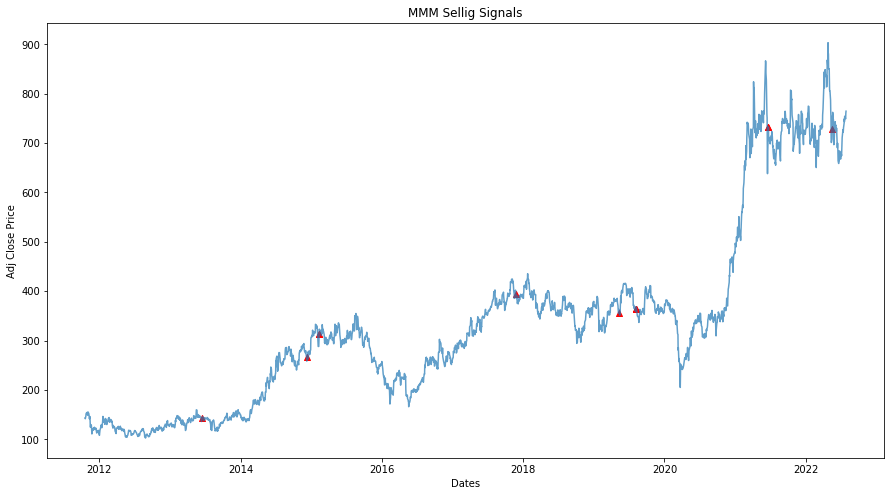

In [26]:
plt.figure(figsize=(15,8))
plt.scatter(frame.loc[sell].index, frame.loc[sell]['Adj Close'], marker='^', c='r')
plt.plot(frame['Adj Close'], alpha=0.7)
plt.title('MMM Sellig Signals')
plt.xlabel("Dates")
plt.ylabel('Adj Close Price')
plt.show()

In [27]:
# Time to calculate PnL
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
Profits

array([ 0.03544132,  0.03996283,  0.0781934 ,  0.07312978,  0.03566082,
        0.01648805, -0.00328256, -0.00288981, -0.00524178,  0.0078332 ,
        0.01756029,  0.08345534,  0.15049749, -0.01976285])

In [29]:
# Winning Rate
wins = [i for i in Profits if i > 0]
wins

[0.035441322583963104,
 0.039962825278810406,
 0.07819339647773471,
 0.07312977976055014,
 0.035660817438824814,
 0.016488046443075156,
 0.007833196074463861,
 0.01756028898919236,
 0.08345534407027819,
 0.1504974906029869]

In [30]:
len(wins)/len(Profits)

0.7142857142857143

In [31]:
len(wins)

10

In [32]:
len(Profits)

14

Only made 14 trades in 10 Years

In [33]:
MatrixSignals = []
MatrixProfits = []

for i in range(len(tickers)):
    print(i)
    frame = RSICalc(tickers[i])
    buy, sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    MatrixSignals.append(buy)
    MatrixProfits.append(Profits)

print('Finished!')

0
[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed
4
[*********************100%***********************]  1 of 1 completed
5
[*********************100%***********************]  1 of 1 completed
6
[*********************100%***********************]  1 of 1 completed
7
[*********************100%***********************]  1 of 1 completed
8
[*********************100%***********************]  1 of 1 completed
9
[*********************100%***********************]  1 of 1 completed
10
[*********************100%***********************]  1 of 1 completed
11
[*********************100%***********************]  1 of 1 completed
12
[*********************100%***********************]  1 of 1 completed
13
[*********************100%***********************]  1 of 1 completed
14

In [34]:
len(MatrixProfits)

50

In [35]:
AllProfits = []

for i in MatrixProfits:
    for e in i:
        AllProfits.append(e)

In [36]:
AllProfits

[0.035441322583963104,
 0.039962825278810406,
 0.07819339647773471,
 0.07312977976055014,
 0.035660817438824814,
 0.016488046443075156,
 -0.0032825631304368454,
 -0.0028898098546003537,
 -0.005241777130091828,
 0.007833196074463861,
 0.01756028898919236,
 0.08345534407027819,
 0.1504974906029869,
 -0.019762845849802372,
 0.014735087268254706,
 0.033321731589697506,
 0.01381690942305907,
 0.014391639807405205,
 0.012486078268708194,
 0.016896045395269805,
 0.01702129026543253,
 0.04250988187252639,
 0.04324941395076516,
 0.02424488904255318,
 0.02418704836956382,
 0.0064516129032258064,
 0.05128376193402017,
 0.00245398773006135,
 -0.11745214621391677,
 -0.10180387399904602,
 -0.14817563754851618,
 -0.1141492851645423,
 -0.12510631985765425,
 -0.11662813401328724,
 -0.13358778625954199,
 -0.12333091704803781,
 -0.05,
 0.023008849557522124,
 0.0128800057329085,
 0.011753481302301255,
 0.001506080856612903,
 0.005405127063673859,
 0.011676537251642485,
 0.026988379283301157,
 0.0202914853

In [37]:
wins = [i for i in AllProfits if i > 0]

In [38]:
len(wins)/len(AllProfits)

0.7244640605296343

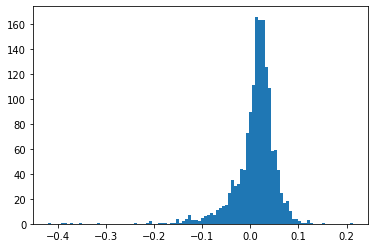

In [39]:
plt.hist(AllProfits, bins=100)
plt.show()

In [40]:
# 2021 Signals
for i in MatrixSignals:
    for e in i:
        if e.year == 2021:
            print(e)

2021-06-17 00:00:00
2021-06-18 00:00:00
2021-01-28 00:00:00
2021-01-29 00:00:00
2021-02-01 00:00:00
2021-02-08 00:00:00
2021-03-01 00:00:00
2021-10-22 00:00:00
2021-10-25 00:00:00
2021-10-26 00:00:00
2021-10-27 00:00:00
2021-04-13 00:00:00
2021-07-30 00:00:00
2021-08-02 00:00:00
2021-03-01 00:00:00
2021-03-16 00:00:00
2021-03-17 00:00:00
2021-03-18 00:00:00
2021-03-26 00:00:00
2021-07-20 00:00:00
2021-07-23 00:00:00
2021-07-26 00:00:00
2021-07-27 00:00:00
2021-07-28 00:00:00
2021-07-29 00:00:00
2021-07-30 00:00:00
2021-08-12 00:00:00
2021-01-19 00:00:00
2021-04-13 00:00:00
2021-04-20 00:00:00
2021-11-23 00:00:00
2021-11-29 00:00:00
2021-01-19 00:00:00
2021-03-25 00:00:00
2021-03-26 00:00:00
2021-12-21 00:00:00
2021-12-22 00:00:00
2021-07-13 00:00:00
2021-07-14 00:00:00
2021-07-15 00:00:00
2021-07-16 00:00:00
2021-07-19 00:00:00
2021-09-22 00:00:00
2021-11-01 00:00:00
2021-03-02 00:00:00
2021-12-20 00:00:00
2021-12-21 00:00:00
2021-01-07 00:00:00
2021-10-05 00:00:00
2021-10-06 00:00:00
